(array([ 351, 1227]),)


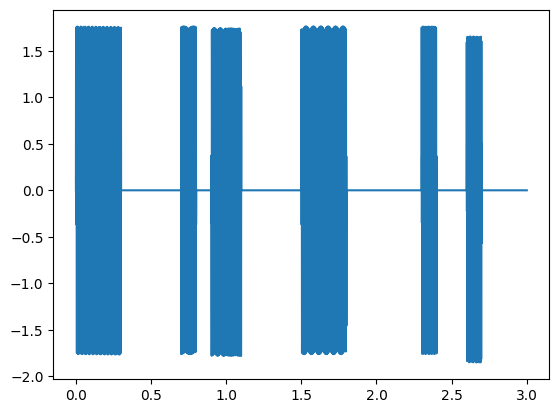

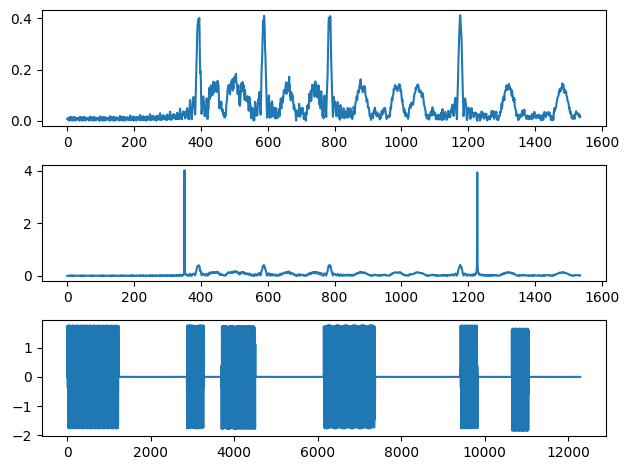

In [58]:
import math
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time

t = np.linspace(0, 3, 12 * 1024)
thirdOctave = {
    "C3": 130.81,
    "D3": 146.83,
    "E3": 164.81,
    "F3": 174.61,
    "G3": 196,
    "A3": 220,
    "B3": 246.93,
}
fourthOctave = {
    "C4": 261.63,
    "D4": 293.66,
    "E4": 329.63,
    "F4": 349.23,
    "G4": 392.00,
    "A4": 440.00,
    "B4": 493.88,
}


f1 = list(thirdOctave.values())
f2 = list(fourthOctave.values())


ti = np.array([0, 0.7, 0.9, 1.0, 1.5, 2.3, 2.6, 2.9])
Ti = np.array([0.3, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1])
N = 7




u = lambda t, shift: np.heaviside(-shift + t, 0)
x = lambda f1, f2: (np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t))
res = 0
resNoise = 0
resTotal = 0

for j in range(N):
    f1 = list(thirdOctave.values())
    f2 = list(fourthOctave.values())
    np.random.randint(0, len(f1))
    np.random.randint(0, len(f2))
    res += x(f1[j], f2[j]) * ((t >= ti[j]) & (t <= (ti[j] + Ti[j])))


plt.plot(t, res)




𝑁 = 3 * 1024
𝑓 = np.linspace(0, 512, int(𝑁 / 2))

x_f = fft(res)
x_f = 2 / N * np.abs(x_f[0 : int(N / 2)])

𝑓𝑛1, 𝑓𝑛2 = np.random.randint(0,512,2)
n = lambda t: (
    np.sin(2 * fn1 * np.pi * t)
    + np.sin(2 * fn2 * np.pi * t)
)

resTotal = n(t) + res
x_n = fft(resTotal)
x_n = 2/N * np.abs(x_n [0:int(N/2)])

a = np.where(x_n>math.ceil(np.max(res)))
print(a)

peak1 = int(f[index1])
peak2 = int(f[index2])

xFiltered = resTotal - (np.sin(2*np.pi*peak1*t)+np.sin(2*np.pi*peak2*t))
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x_f)
plt.subplot(3, 1, 2)
plt.plot(x_n)
plt.subplot(3, 1, 3)
plt.plot(xFiltered)
plt.tight_layout()


sd.play(res, 3*1024)
sd.play(xFiltered, 3*1024)
